In [700]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [701]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [702]:
df=pd.read_csv("D:/ML&AI/train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [703]:
df.shape

(1460, 81)

In [704]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [705]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [706]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

#### Dropping following columns which have less than 90% of data - 'Alley',  'PoolQC', 'Fence' and 'MiscFeature'.Id column is also not required

In [707]:
df = df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
df.shape

(1460, 76)

In [708]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [709]:
print('PoolArea ' + str(len(df[df['PoolArea'] != 0])))
print('3SsnPorch ' + str(len(df[df['3SsnPorch'] != 0])))
print('EnclosedPorch ' + str(len(df[df['EnclosedPorch'] != 0])))
print('WoodDeckSF ' + str(len(df[df['WoodDeckSF'] != 0])))
print('PavedDrive ' + str(len(df[df['PavedDrive'] != 0])))
print('LowQualFinSF ' + str(len(df[df['LowQualFinSF'] != 0])))
print('2ndFlrSF ' + str(len(df[df['2ndFlrSF'] != 0])))
print('BsmtFinSF2 ' + str(len(df[df['BsmtFinSF2'] != 0])))
print('BsmtFinSF1 ' + str(len(df[df['BsmtFinSF2'] != 0])))
print('BsmtFinType2 ' + str(len(df[df['BsmtFinType2'] != 0])))
print('BsmtFinType1 ' + str(len(df[df['BsmtFinType1'] != 0])))
print('MiscVal ' + str(len(df[df['MiscVal'] != 0])))

PoolArea 7
3SsnPorch 24
EnclosedPorch 208
WoodDeckSF 699
PavedDrive 1460
LowQualFinSF 26
2ndFlrSF 631
BsmtFinSF2 167
BsmtFinSF1 167
BsmtFinType2 1460
BsmtFinType1 1460
MiscVal 52


#### From above two statement we can see there are columns with most of the value as 0. After checking the importance of these column in metadata, I will remove the column PoolArea, 3SsnPorch, EnclosedPorch, LowQualFinSF, BsmtFinSF2, BsmtFinSF1, MiscVal

In [710]:
df = df.drop(['PoolArea', '3SsnPorch', 'EnclosedPorch', 'LowQualFinSF', 'BsmtFinSF2', 'BsmtFinSF1', 'MiscVal'], axis=1)
df.shape

(1460, 69)

In [711]:
len(df[df['GarageArea'] == 0 & (df['GarageQual'].isnull()) & (df['GarageCond'].isnull()) & (df['GarageType'].isnull()) 
       & (df['GarageFinish'].isnull())])

81

In [712]:
len(df[(df['BsmtExposure'].isnull())])

38

#### From above we can observe that 81 record in ('GarageQual' , 'GarageCond', 'GarageType', 'GarageFinish') is missing and 81 record in 'GarageArea' have 0 value. So we can impute 'NA' in ('GarageQual' , 'GarageCond', 'GarageType', 'GarageFinish') column which means 'No Garage' as per data dictionary.

In [713]:
df.GarageQual = df.apply(lambda x:'NA' if x['GarageArea'] == 0 else x['GarageQual'], axis=1)
df.GarageCond = df.apply(lambda x:'NA' if x['GarageArea'] == 0 else x['GarageCond'], axis=1)
df.GarageType = df.apply(lambda x:'NA' if x['GarageArea'] == 0 else x['GarageType'], axis=1)
df.GarageFinish = df.apply(lambda x:'NA' if x['GarageArea'] == 0 else x['GarageFinish'], axis=1)

In [714]:
len(df[(df['BsmtQual'].isnull()) &  (df['BsmtCond'].isnull()) & (df['BsmtExposure'].isnull()) 
       & (df['BsmtFinType1'].isnull()) & (df['BsmtFinType2'].isnull())]) 

37

#### From above analysing the 5 basesment related column which is having 2.53% (37 records) missing value and checking the data dictionary, 'NA' can be imputed.

In [715]:
df.BsmtQual = df['BsmtQual'].fillna('NA')
df.BsmtCond = df['BsmtCond'].fillna('NA')
df.BsmtExposure = df['BsmtExposure'].fillna('NA')
df.BsmtFinType1 = df['BsmtFinType1'].fillna('NA')
df.BsmtFinType2 = df['BsmtFinType2'].fillna('NA')

In [716]:
df.BsmtQual.unique()

array(['Gd', 'TA', 'Ex', 'NA', 'Fa'], dtype=object)

In [717]:
len(df[df.BsmtQual == 'NA'])

37

In [718]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'NA', 'Ex', 'Po'], dtype=object)

In [719]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,15.060959,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,55.757415,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,480.000000,12.000000,2010.000000,755000.000000


#### 'LotFrontage' column have 17.74% null value so inputing median value (69.0) in it. There is some outlier present in 'LotFrontage', thats why median is preferred choice then mean. In later part of code outlier can be removed if required.

In [720]:
len(df[df.LotFrontage.isnull()])

259

In [721]:
df.LotFrontage = df['LotFrontage'].fillna(69.0)
len(df[df.LotFrontage.isnull()])

0

In [722]:
len(df[df.Fireplaces == 0])

690

In [723]:
len(df[df.FireplaceQu.isnull()])

690

#### From above two code we can see that if the Fireplaces=0 then there is null in FireplaceQu. So we can impute 'NA' in 'FireplaceQu' column which means 'No Fireplace' as per data dictionary. 
#### Imputing NA below

In [724]:
df.FireplaceQu = df.FireplaceQu.fillna('NA')

In [725]:
df = df[~((df.MasVnrType.isnull()) | (df.MasVnrArea.isnull()) | (df.Electrical.isnull()))]

In [726]:
round(100*(df.isnull().sum()/len(df.index)), 2)

MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinType2     0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.00
1stFlrSF         0.00
2ndFlrSF         0.00
GrLivArea        0.00
BsmtFullBath     0.00
BsmtHalfBath     0.00
FullBath         0.00
HalfBath  

#### All the null value are handled except for 'GarageYrBlt' column. If there is no garage then this year is not required. So for now keeping column as it is.

In [727]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotFrontage    1451 non-null   float64
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [728]:
df.FullBath.unique()

array([2, 1, 3, 0], dtype=int64)

In [729]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1370.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,56.933150,69.845624,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,567.197105,1056.310131,1161.551344,346.742247,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1978.353285,1.764990,472.525155,94.412819,46.422467,15.154376,6.319090,2007.815300,180624.101999
std,42.350366,22.044429,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,442.209192,437.914609,385.002532,436.453277,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,24.685798,0.748728,214.171752,125.436852,66.060150,55.917522,2.700353,1.329376,79312.128273
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,222.000000,795.000000,882.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,327.500000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,50.000000,69.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,479.000000,991.000000,1086.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.500000,2.000000,478.000000,0.000000,24.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,79.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,808.000000,1297.500000,1391.000000,728.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,480.000000,12.000000,2010.000000,755000.000000


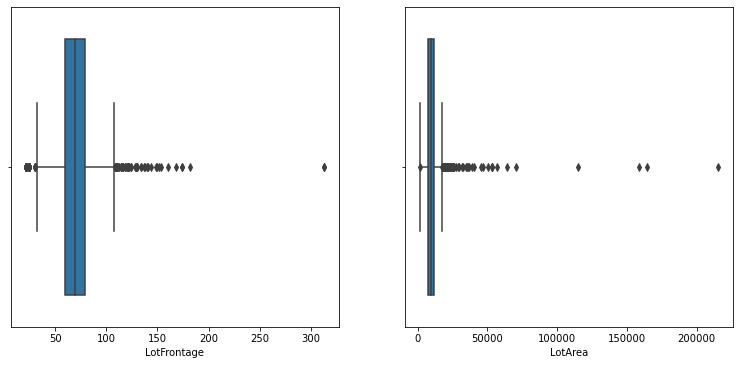

In [730]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(df.LotFrontage)
plt.subplot(3,3,2)
sns.boxplot(df.LotArea)
plt.show()

#### From above boxplot and describe command , we can see outlier present in 'LotArea' and 'LotFrontage'. Checking and removing outlier from both column below

In [731]:
df = df[~((df.LotArea > 100000) | (df.LotFrontage > 150))]
df.shape

(1438, 69)

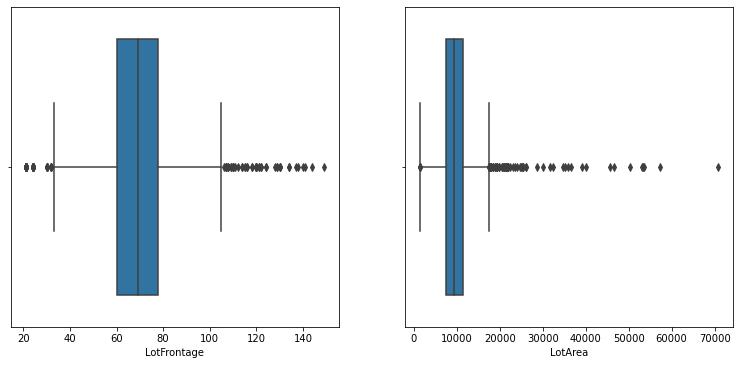

In [732]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(df.LotFrontage)
plt.subplot(3,3,2)
sns.boxplot(df.LotArea)
plt.show()

In [733]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,SalePrice
count,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1358.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000
mean,56.950626,68.984701,10007.634214,6.083449,5.581363,1971.057024,1984.691933,103.216968,568.767038,1050.362309,1155.963839,344.068846,1505.694019,0.419332,0.057024,1.558414,0.381780,2.863004,1.046592,6.504172,0.605702,1978.357879,1.762170,471.195410,93.942281,46.253825,15.291377,6.317803,2007.817803,179671.347010
std,42.341879,18.897881,5414.055933,1.374787,1.114209,30.220361,20.655617,180.128297,443.114085,415.182978,371.157802,433.030110,506.488154,0.514334,0.237893,0.549937,0.502881,0.814795,0.220517,1.617466,0.637187,24.678718,0.748305,212.591928,124.471085,65.904870,56.151221,2.698973,1.330093,77580.167175
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,223.250000,795.000000,882.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,326.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129600.000000
50%,50.000000,69.000000,9434.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,481.500000,990.000000,1083.500000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.500000,2.000000,478.000000,0.000000,24.000000,0.000000,6.000000,2008.000000,161875.000000
75%,70.000000,78.000000,11494.500000,7.000000,6.000000,2000.000000,2004.000000,165.750000,809.500000,1285.500000,1382.750000,728.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,213000.000000
max,190.000000,149.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2336.000000,3206.000000,3228.000000,1872.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,857.000000,547.000000,480.000000,12.000000,2010.000000,755000.000000


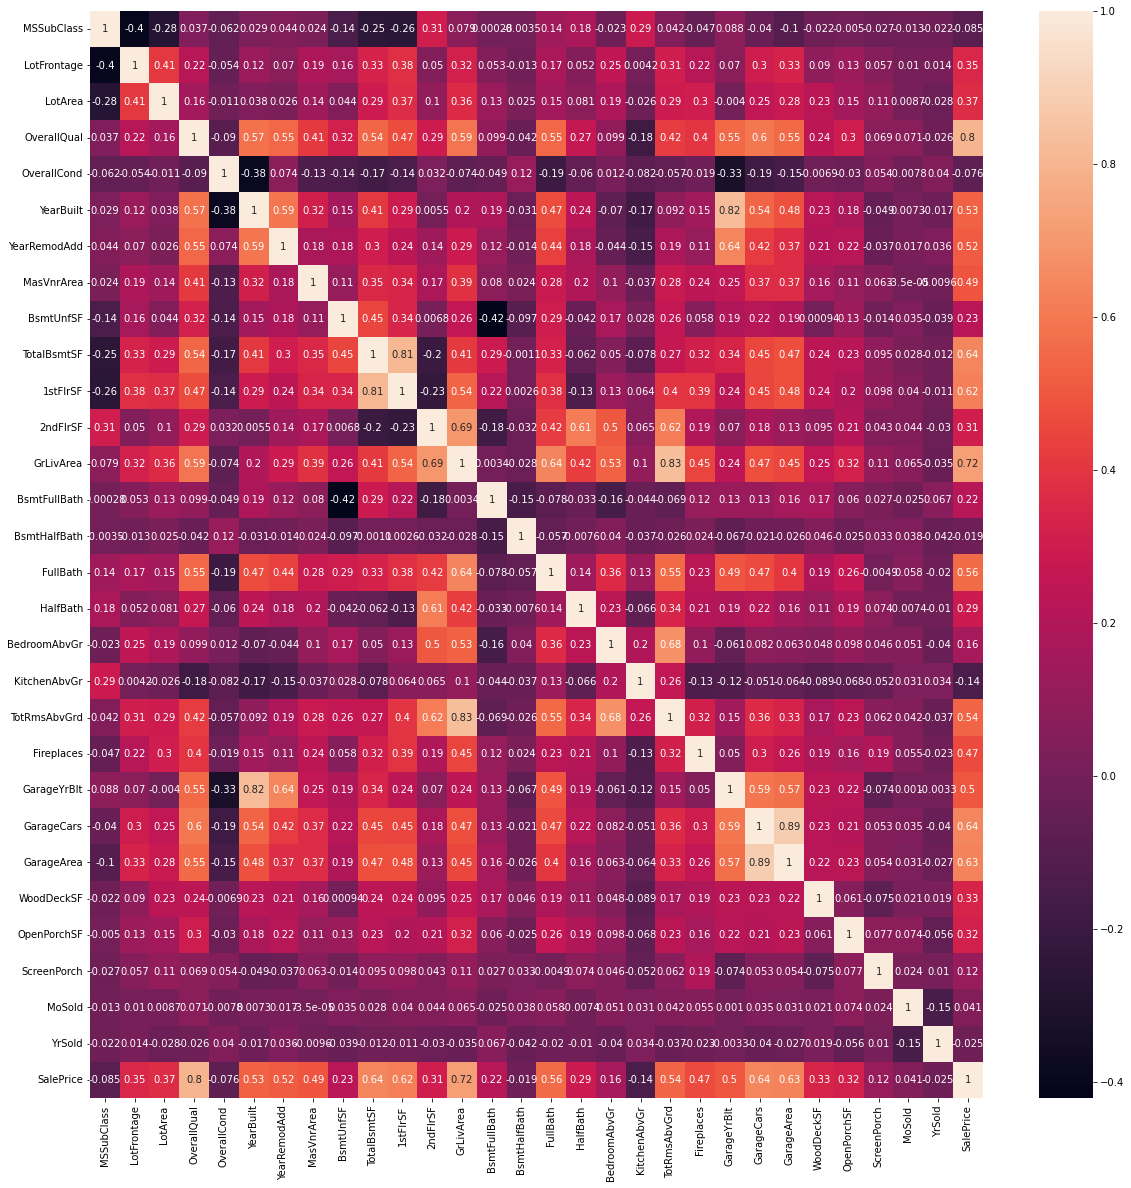

In [734]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### From heatmap , we can check collinearity value. If value >= 0.8, we can remove any one feature from the dataframe.
#### 'GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars' feature have value greater then or equal to 0.8, so removing them. Not removing 'OverallQual' as it is correlated with SalePrice.

In [735]:
df = df.drop(['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd', 'GarageCars'], axis=1)
df.shape

(1438, 65)

In [736]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MoSold,YrSold,SalePrice
count,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000
mean,56.950626,68.984701,10007.634214,6.083449,5.581363,1971.057024,1984.691933,103.216968,568.767038,1050.362309,344.068846,1505.694019,0.419332,0.057024,1.558414,0.381780,2.863004,1.046592,0.605702,471.195410,93.942281,46.253825,15.291377,6.317803,2007.817803,179671.347010
std,42.341879,18.897881,5414.055933,1.374787,1.114209,30.220361,20.655617,180.128297,443.114085,415.182978,433.030110,506.488154,0.514334,0.237893,0.549937,0.502881,0.814795,0.220517,0.637187,212.591928,124.471085,65.904870,56.151221,2.698973,1.330093,77580.167175
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,223.250000,795.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,326.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129600.000000
50%,50.000000,69.000000,9434.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,481.500000,990.000000,0.000000,1456.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,478.000000,0.000000,24.000000,0.000000,6.000000,2008.000000,161875.000000
75%,70.000000,78.000000,11494.500000,7.000000,6.000000,2000.000000,2004.000000,165.750000,809.500000,1285.500000,728.000000,1768.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,1.000000,576.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,213000.000000
max,190.000000,149.000000,70761.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2336.000000,3206.000000,1872.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,3.000000,1390.000000,857.000000,547.000000,480.000000,12.000000,2010.000000,755000.000000


In [737]:
df.BsmtHalfBath.unique()

array([0, 1, 2], dtype=int64)

In [738]:
df.BsmtFullBath.unique()

array([1, 0, 2, 3], dtype=int64)

In [739]:
df.FullBath.unique()

array([2, 1, 3, 0], dtype=int64)

In [740]:
df.HalfBath.unique()

array([1, 0, 2], dtype=int64)

In [741]:
df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [742]:
df.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

#### Correcting the value of 'MSZoning'. Converting 'C (all)' to 'C'

In [743]:
df['MSZoning'] = df.apply(lambda x:'C' if x['MSZoning'] == 'C (all)' else x['MSZoning'], axis=1)

In [744]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C', 'FV', 'RH'], dtype=object)

#### Creating dummy variable below from the categorical variable. Concatinating in the main dataframe and dropping the variable from where these dummies variable are generated.

In [745]:
df_categorical = df.loc[:, ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                            'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                            'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                            'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                            'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                            'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                            'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
                            'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

In [746]:
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head()

,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,7,5,1,0,2,1,3,1,2,2008,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,

In [747]:
df_dummies.shape

(1438, 220)

In [748]:
df_OverallQual = pd.get_dummies(df['OverallQual'], prefix='OverallQual', prefix_sep='', drop_first=True)
df_OverallCond = pd.get_dummies(df['OverallCond'], prefix='OverallCond', prefix_sep='', drop_first=True)
df_FullBath = pd.get_dummies(df['FullBath'], prefix='FullBath', prefix_sep='', drop_first=True)
df_HalfBath = pd.get_dummies(df['HalfBath'], prefix='HalfBath', prefix_sep='', drop_first=True)
df_BedroomAbvGr = pd.get_dummies(df['BedroomAbvGr'], prefix='BedroomAbvGr', prefix_sep='', drop_first=True)
df_MoSold = pd.get_dummies(df['MoSold'], prefix='MoSold', prefix_sep='', drop_first=True)
df_YrSold = pd.get_dummies(df['YrSold'], prefix='YrSold', prefix_sep='', drop_first=True)

In [749]:
ndf = pd.concat([df, df_dummies, df_OverallQual, df_OverallCond, df_FullBath, df_HalfBath, df_BedroomAbvGr, df_MoSold, 
                  df_YrSold], axis=1)

In [750]:
ndf.shape

(1438, 329)

In [751]:
ndf = ndf.drop(['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                  'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 
                  'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
                  'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                  'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 
                  'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'FireplaceQu', 
                  'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType', 
                  'SaleCondition'],axis=1)

In [752]:
ndf.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual2,OverallQual3,OverallQual4,OverallQual5,OverallQual6,OverallQual7,OverallQual8,OverallQual9,OverallQual10,OverallCond2,OverallCond3,OverallCond4,OverallCond5,OverallCond6,OverallCond7,OverallCond8,OverallCond9,FullBath1,FullBath2,FullBath3,HalfBath1,HalfBath2,BedroomAbvGr1,BedroomAbvGr2,BedroomAbvGr3,BedroomAbvGr4,BedroomAbvGr5,BedroomAbvGr6,BedroomAbvGr8,MoSold2,MoSold3

In [753]:
ndf.shape

(1438, 267)

#### Spliting the data into train(70%) and test(30%) set using sklearn 

In [754]:
import sklearn 
from sklearn.model_selection import train_test_split

In [755]:
df_train,df_test = train_test_split(ndf, train_size=.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1006, 267)
(432, 267)


In [756]:
df_train.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual2,OverallQual3,OverallQual4,OverallQual5,OverallQual6,OverallQual7,OverallQual8,OverallQual9,OverallQual10,OverallCond2,OverallCond3,OverallCond4,OverallCond5,OverallCond6,OverallCond7,OverallCond8,OverallCond9,FullBath1,FullBath2,FullBath3,HalfBath1,HalfBath2,BedroomAbvGr1,BedroomAbvGr2,BedroomAbvGr3,BedroomAbvGr4,BedroomAbvGr5,BedroomAbvGr6,BedroomAbvGr8,MoSold2,MoSold3

#### Normalizing the data of numerical feature using MinMax Scaler. Check the normalized data using describe too.

In [757]:
num_var = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 
           'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'SalePrice']

In [758]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
df_train[num_var] = Scaler.fit_transform(df_train[num_var])
df_train.describe()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual2,OverallQual3,OverallQual4,OverallQual5,OverallQual6,OverallQual7,OverallQual8,OverallQual9,OverallQual10,OverallCond2,OverallCond3,OverallCond4,OverallCond5,OverallCond6,OverallCond7,OverallCond8,OverallCond9,FullBath1,FullBath2,FullBath3,HalfBath1,HalfBath2,BedroomAbvGr1,BedroomAbvGr2,BedroomAbvGr3,BedroomAbvGr4,BedroomAbvGr5,BedroomAbvGr6,BedroomAbvGr8,MoSold2,MoSold3

#### Creating X and Y variable for the train set.
#### SalePrice is the target variable

In [759]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [760]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

#### Building model using RFE

In [761]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,50)
rfe = rfe.fit(X_train,y_train)

In [762]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 62),
 ('MasVnrArea', False, 23),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', False, 100),
 ('GrLivArea', True, 1),
 ('Fireplaces', False, 93),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 49),
 ('OpenPorchSF', False, 109),
 ('ScreenPorch', False, 30),
 ('MSZoning_FV', False, 36),
 ('MSZoning_RH', False, 39),
 ('MSZoning_RL', False, 37),
 ('MSZoning_RM', False, 38),
 ('Street_Pave', False, 50),
 ('LotShape_IR2', False, 207),
 ('LotShape_IR3', False, 63),
 ('LotShape_Reg', False, 190),
 ('LandContour_HLS', False, 191),
 ('LandContour_Low', False, 21),
 ('LandContour_Lvl', False, 98),
 ('Utilities_NoSeWa', False, 28),
 ('LotConfig_CulDSac', False, 82),
 ('LotConfig_FR2', False, 189),
 ('LotConfig_FR3', False, 170),
 ('LotConfig_Inside', False, 212),
 ('LandSlope_Mod', False, 132),
 ('LandSlope_Sev', False, 159),
 ('Neighborhood_Blueste', False, 116),
 ('Neighborhood_BrDale', False, 131),
 ('

In [763]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'YearBuilt', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea',
       'GarageArea', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Condition1_RRAe', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Exterior1st_CBlock', 'BsmtCond_Po', 'Heating_Wall', 'Electrical_Mix',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_NA',
       'GarageFinish_NA', 'GarageQual_NA', 'GarageCond_NA', 'SaleType_Con',
       'SaleType_New', 'SaleCondition_Partial', 'OverallQual2', 'OverallQual3',
       'OverallQual4', 'OverallQual5', 'OverallQual6', 'OverallQual7',
       'OverallQual8', 'OverallQual9', 'OverallQual10', 'OverallCond5',
       'OverallCond6', 'OverallCond7', 'OverallCond8', 'OverallCond9',
       'FullBath3', 'BedroomAbvGr5'],
      dtype='object')

#### From above list, we  get Top 50 feature
#### Now further manually analyse with Statsmodel. 

In [764]:
X_train_top50 = X_train[col]

In [765]:
import statsmodels.api as sm
X_train_top50 = sm.add_constant(X_train_top50)
X_train_top50.head()

,const,LotArea,YearBuilt,BsmtUnfSF,TotalBsmtSF,GrLivArea,GarageArea,Neighborhood_Crawfor,Neighborhood_NoRidge,Condition1_RRAe,Condition2_PosA,Condition2_PosN,Condition2_RRAe,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_CBlock,BsmtCond_Po,Heating_Wall,Electrical_Mix,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Sev,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageQual_NA,GarageCond_NA,SaleType_Con,SaleType_New,SaleCondition_Partial,OverallQual2,OverallQual3,OverallQual4,OverallQual5,OverallQual6,OverallQual7,OverallQual8,OverallQual9,OverallQual10,OverallCond5,OverallCond6,OverallCond7,OverallCond8,OverallCond9,FullBath3,BedroomAbvGr5
1446,1.0,0.355998,0.635659,0.276359,0.370555,0.193399,0.230088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
390,1.0,0.099994,0.155039,0.106363,0.268559,0.239556,0.283186,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1008,1.0,0.153585,0.961240,0.794241,0.533375,0.328004,0.405605,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1129,1.0,0.082602,0.775194,0.000000,0.291953,0.128417,0.495575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1157,1.0,0.050863,0.984496,0.190432,0.409857,0.225890,0.461652,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [766]:
lr = sm.OLS(y_train, X_train_top50).fit()

In [767]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:23:42   Log-Likelihood:                 2074.1
No. Observations:                1006   AIC:                            -4054.
Df Residuals:                     959   BIC:                            -3823.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0383      0.018     -2.169      0.030      -0.073      -0.004
LotArea                   0.1396      0.015      9.267      0.000       0.110       0.169
YearBuilt                 0.0815      0.008     10.146      0.000       0.066       0.097
BsmtUnfSF                -0.0588      0.006     -9.893      0.000      -0.070      -0.047
TotalBsmtSF               0.1699      0.012     14.564      0.000       0.147       0.193
GrLivArea                 0.2769      0.012     22.401      0.000       0.253       0.301
GarageArea                0.0609      0.011      5.734      0.000       0.040       0.082
Neighborhood_Crawfor      0.0456      0.006      7.935      0.000       0.034       0.057
Neighborhood_NoRidge      0.0384      0.008      4.983      0.000       0.023       0.054
Condition1_RRAe          -0.0374      0.011     -3.458      0.001      -0.059      -0.016
Condition2_PosA          -0.1061      0.035     -2.998      0.003      -0.176      -0.037
Condition2_PosN          -0.1229      0.034     -3.591      0.000      -0.190      -0.056
Condition2_RRAe          -0.0782      0.032     -2.434      0.015      -0.141      -0.015
RoofMatl_WdShngl          0.0360      0.016      2.265      0.024       0.005       0.067
Exterior1st_BrkComm      -0.0723      0.032     -2.257      0.024      -0.135      -0.009
Exterior1st_CBlock       -0.0126      0.032     -0.395      0.693      -0.075       0.050
BsmtCond_Po              -0.0428      0.028     -1.557      0.120      -0.097       0.011
Heating_Wall              0.0179      0.023      0.777      0.437      -0.027       0.063
Electrical_Mix            0.0313      0.040      0.788      0.431      -0.047       0.109
KitchenQual_Fa           -0.0451      0.009     -5.082      0.000      -0.063      -0.028
KitchenQual_Gd           -0.0350      0.005     -6.485      0.000      -0.046      -0.024
KitchenQual_TA           -0.0406      0.006     -6.869      0.000      -0.052      -0.029
Functional_Sev           -0.1128      0.034     -3.312      0.001      -0.180      -0.046
GarageType_Attchd         0.0598      0.015      3.929      0.000       0.030       0.090
GarageType_Basment        0.0515      0.017      2.993      0.003       0.018       0.085
GarageType_BuiltIn        0.0673      0.016      4.230      0.000       0.036       0.099
GarageType_CarPort        0.0365      0.019      1.903      0.057      -0.001       0.074
GarageType_Detchd         0.0568      0.015      3.739      0.000       0.027       0.087
GarageType_NA             0.0146      0.004      3.471      0.001       0.006       0.023
GarageFinish_NA           0.0146      0.004      3.471      0.001       0.006       0.023
GarageQual_NA             0.0146      0.004      3.471      0.001       0.006       0.023
GarageCond_NA          

#### With 50 variables, the R-squared= 0.92 and Adj. R-squared:	0.91
#### We can see that the p-value for some variables ('Condition2_RRAe', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'BsmtCond_Po', 'Heating_Wall', 'Electrical_Mix', 'GarageType_CarPort', 'SaleType_Con', 'OverallQual2', 'OverallQual7', 'OverallQual8')  are greater then 0.005. So drop those variables and check R-squared value.

In [768]:
X_train_top38 = X_train_top50.drop(['Condition2_RRAe', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 
                                    'BsmtCond_Po', 'Heating_Wall', 'Electrical_Mix', 'GarageType_CarPort', 'SaleType_Con', 
                                    'OverallQual2', 'OverallQual7', 'OverallQual8'], axis=1)

In [769]:
X_train_top38 = sm.add_constant(X_train_top38)

In [770]:
lr = sm.OLS(y_train,X_train_top38).fit()

In [771]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     282.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:23:48   Log-Likelihood:                 2017.7
No. Observations:                1006   AIC:                            -3963.
Df Residuals:                     970   BIC:                            -3787.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0369      0.015     -2.450      0.014      -0.066      -0.007
LotArea                   0.1405      0.015      9.284      0.000       0.111       0.170
YearBuilt                 0.0813      0.008      9.687      0.000       0.065       0.098
BsmtUnfSF                -0.0611      0.006     -9.836      0.000      -0.073      -0.049
TotalBsmtSF               0.1878      0.012     15.649      0.000       0.164       0.211
GrLivArea                 0.2807      0.013     21.951      0.000       0.256       0.306
GarageArea                0.0738      0.011      6.863      0.000       0.053       0.095
Neighborhood_Crawfor      0.0454      0.006      7.577      0.000       0.034       0.057
Neighborhood_NoRidge      0.0490      0.008      6.125      0.000       0.033       0.065
Condition1_RRAe          -0.0391      0.011     -3.439      0.001      -0.061      -0.017
Condition2_PosA          -0.1035      0.037     -2.809      0.005      -0.176      -0.031
Condition2_PosN          -0.1341      0.036     -3.747      0.000      -0.204      -0.064
KitchenQual_Fa           -0.0553      0.009     -6.088      0.000      -0.073      -0.037
KitchenQual_Gd           -0.0435      0.006     -7.823      0.000      -0.054      -0.033
KitchenQual_TA           -0.0512      0.006     -8.422      0.000      -0.063      -0.039
Functional_Sev           -0.0979      0.035     -2.805      0.005      -0.166      -0.029
GarageType_Attchd         0.0414      0.010      4.008      0.000       0.021       0.062
GarageType_Basment        0.0351      0.013      2.613      0.009       0.009       0.061
GarageType_BuiltIn        0.0504      0.011      4.447      0.000       0.028       0.073
GarageType_Detchd         0.0388      0.010      3.785      0.000       0.019       0.059
GarageType_NA             0.0110      0.003      3.693      0.000       0.005       0.017
GarageFinish_NA           0.0110      0.003      3.693      0.000       0.005       0.017
GarageQual_NA             0.0110      0.003      3.693      0.000       0.005       0.017
GarageCond_NA             0.0110      0.003      3.693      0.000       0.005       0.017
SaleType_New              0.1894      0.034      5.516      0.000       0.122       0.257
SaleCondition_Partial    -0.1536      0.034     -4.499      0.000      -0.221      -0.087
OverallQual3             -0.0266      0.010     -2.652      0.008      -0.046      -0.007
OverallQual4             -0.0270      0.005     -4.949      0.000      -0.038      -0.016
OverallQual5             -0.0343      0.004     -8.708      0.000      -0.042      -0.027
OverallQual6             -0.0252      0.003     -7.489      0.000      -0.032      -0.019
OverallQual9              0.0788      0.008     10.127      0.000       0.064       0.094
OverallQual10          

#### With 38 variables, the R-squared= 0.91 and Adj. R-squared:	0.90
#### We can see that the p-value of 'GarageType_Basment' and 'OverallQual3' greater then 0.005. So drop those variables and check R-squared value.

In [772]:
X_train_top36 = X_train_top38.drop(['GarageType_Basment', 'OverallQual3'], axis=1)

In [773]:
X_train_top36 = sm.add_constant(X_train_top36)

In [774]:
lr = sm.OLS(y_train,X_train_top36).fit()

In [775]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     295.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:23:53   Log-Likelihood:                 2010.3
No. Observations:                1006   AIC:                            -3953.
Df Residuals:                     972   BIC:                            -3786.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0281      0.013     -2.226      0.026      -0.053      -0.003
LotArea                   0.1377      0.015      9.051      0.000       0.108       0.168
YearBuilt                 0.0863      0.008     10.379      0.000       0.070       0.103
BsmtUnfSF                -0.0608      0.006     -9.723      0.000      -0.073      -0.049
TotalBsmtSF               0.1911      0.012     15.914      0.000       0.168       0.215
GrLivArea                 0.2883      0.013     22.789      0.000       0.263       0.313
GarageArea                0.0687      0.011      6.403      0.000       0.048       0.090
Neighborhood_Crawfor      0.0463      0.006      7.671      0.000       0.034       0.058
Neighborhood_NoRidge      0.0489      0.008      6.065      0.000       0.033       0.065
Condition1_RRAe          -0.0403      0.011     -3.524      0.000      -0.063      -0.018
Condition2_PosA          -0.1002      0.037     -2.703      0.007      -0.173      -0.027
Condition2_PosN          -0.1324      0.036     -3.677      0.000      -0.203      -0.062
KitchenQual_Fa           -0.0541      0.009     -5.921      0.000      -0.072      -0.036
KitchenQual_Gd           -0.0436      0.006     -7.806      0.000      -0.055      -0.033
KitchenQual_TA           -0.0522      0.006     -8.549      0.000      -0.064      -0.040
Functional_Sev           -0.1180      0.034     -3.443      0.001      -0.185      -0.051
GarageType_Attchd         0.0219      0.007      3.108      0.002       0.008       0.036
GarageType_BuiltIn        0.0305      0.008      3.629      0.000       0.014       0.047
GarageType_Detchd         0.0194      0.007      2.741      0.006       0.006       0.033
GarageType_NA             0.0055      0.002      2.426      0.015       0.001       0.010
GarageFinish_NA           0.0055      0.002      2.426      0.015       0.001       0.010
GarageQual_NA             0.0055      0.002      2.426      0.015       0.001       0.010
GarageCond_NA             0.0055      0.002      2.426      0.015       0.001       0.010
SaleType_New              0.1921      0.035      5.560      0.000       0.124       0.260
SaleCondition_Partial    -0.1560      0.034     -4.542      0.000      -0.223      -0.089
OverallQual4             -0.0232      0.005     -4.535      0.000      -0.033      -0.013
OverallQual5             -0.0306      0.004     -8.289      0.000      -0.038      -0.023
OverallQual6             -0.0224      0.003     -6.914      0.000      -0.029      -0.016
OverallQual9              0.0785      0.008     10.029      0.000       0.063       0.094
OverallQual10             0.1532      0.013     11.551      0.000       0.127       0.179
OverallCond5              0.0285      0.005      5.463      0.000       0.018       0.039
OverallCond6           

#### With 36 variables, the R-squared= 0.90 and Adj. R-squared:	0.90
#### We can see that the p-value for some variables ('Condition2_PosA', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageQual_NA', 'GarageCond_NA')  are greater then 0.005. So drop those variables and check R-squared value.

In [776]:
X_train_top30 = X_train_top36.drop(['Condition2_PosA', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 
                                    'GarageQual_NA', 'GarageCond_NA'], axis=1)

In [777]:
X_train_top30 = sm.add_constant(X_train_top30)

In [778]:
lr = sm.OLS(y_train,X_train_top30).fit()

In [779]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     320.2
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:23:57   Log-Likelihood:                 2002.5
No. Observations:                1006   AIC:                            -3943.
Df Residuals:                     975   BIC:                            -3791.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0085      0.011     -0.795      0.427      -0.029       0.012
LotArea                   0.1368      0.015      8.982      0.000       0.107       0.167
YearBuilt                 0.0870      0.008     10.491      0.000       0.071       0.103
BsmtUnfSF                -0.0604      0.006     -9.625      0.000      -0.073      -0.048
TotalBsmtSF               0.1925      0.012     16.011      0.000       0.169       0.216
GrLivArea                 0.2879      0.013     22.745      0.000       0.263       0.313
GarageArea                0.0615      0.009      6.667      0.000       0.043       0.080
Neighborhood_Crawfor      0.0450      0.006      7.487      0.000       0.033       0.057
Neighborhood_NoRidge      0.0509      0.008      6.299      0.000       0.035       0.067
Condition1_RRAe          -0.0393      0.011     -3.423      0.001      -0.062      -0.017
Condition2_PosN          -0.1213      0.036     -3.366      0.001      -0.192      -0.051
KitchenQual_Fa           -0.0542      0.009     -5.945      0.000      -0.072      -0.036
KitchenQual_Gd           -0.0446      0.006     -7.980      0.000      -0.056      -0.034
KitchenQual_TA           -0.0533      0.006     -8.704      0.000      -0.065      -0.041
Functional_Sev           -0.1347      0.034     -3.966      0.000      -0.201      -0.068
GarageType_Attchd         0.0040      0.003      1.364      0.173      -0.002       0.010
GarageType_BuiltIn        0.0133      0.006      2.394      0.017       0.002       0.024
SaleType_New              0.1942      0.035      5.591      0.000       0.126       0.262
SaleCondition_Partial    -0.1578      0.035     -4.568      0.000      -0.226      -0.090
OverallQual4             -0.0239      0.005     -4.660      0.000      -0.034      -0.014
OverallQual5             -0.0309      0.004     -8.375      0.000      -0.038      -0.024
OverallQual6             -0.0229      0.003     -7.055      0.000      -0.029      -0.017
OverallQual9              0.0784      0.008      9.980      0.000       0.063       0.094
OverallQual10             0.1439      0.013     11.290      0.000       0.119       0.169
OverallCond5              0.0299      0.005      5.714      0.000       0.020       0.040
OverallCond6              0.0359      0.005      6.664      0.000       0.025       0.046
OverallCond7              0.0507      0.006      9.025      0.000       0.040       0.062
OverallCond8              0.0570      0.007      8.392      0.000       0.044       0.070
OverallCond9              0.0491      0.010      4.916      0.000       0.029       0.069
FullBath3                 0.0589      0.009      6.733      0.000       0.042       0.076
BedroomAbvGr5            -0.0359      0.009     -3.948      0.000      -0.054      -0.018
=======================

#### With 30 variables, the R-squared= 0.90 and Adj. R-squared:	0.90
#### We can see that the p-value of 'GarageType_Attchd' and 'GarageType_BuiltIn' are greater then 0.005. So drop those variables and check R-squared value.

In [780]:
X_train_top28 = X_train_top30.drop(['GarageType_Attchd', 'GarageType_BuiltIn'], axis=1)

In [781]:
X_train_top28 = sm.add_constant(X_train_top28)

In [782]:
lr = sm.OLS(y_train,X_train_top28).fit()

In [783]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     341.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:24:04   Log-Likelihood:                 1999.5
No. Observations:                1006   AIC:                            -3941.
Df Residuals:                     977   BIC:                            -3798.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0106      0.011     -1.001      0.317      -0.031       0.010
LotArea                   0.1413      0.015      9.383      0.000       0.112       0.171
YearBuilt                 0.0942      0.008     12.563      0.000       0.080       0.109
BsmtUnfSF                -0.0601      0.006     -9.613      0.000      -0.072      -0.048
TotalBsmtSF               0.1890      0.012     16.323      0.000       0.166       0.212
GrLivArea                 0.2960      0.012     24.266      0.000       0.272       0.320
GarageArea                0.0604      0.009      6.550      0.000       0.042       0.079
Neighborhood_Crawfor      0.0445      0.006      7.394      0.000       0.033       0.056
Neighborhood_NoRidge      0.0495      0.008      6.124      0.000       0.034       0.065
Condition1_RRAe          -0.0418      0.011     -3.662      0.000      -0.064      -0.019
Condition2_PosN          -0.1222      0.036     -3.384      0.001      -0.193      -0.051
KitchenQual_Fa           -0.0556      0.009     -6.096      0.000      -0.073      -0.038
KitchenQual_Gd           -0.0457      0.006     -8.229      0.000      -0.057      -0.035
KitchenQual_TA           -0.0544      0.006     -8.935      0.000      -0.066      -0.042
Functional_Sev           -0.1399      0.034     -4.122      0.000      -0.206      -0.073
SaleType_New              0.1951      0.035      5.607      0.000       0.127       0.263
SaleCondition_Partial    -0.1590      0.035     -4.595      0.000      -0.227      -0.091
OverallQual4             -0.0243      0.005     -4.769      0.000      -0.034      -0.014
OverallQual5             -0.0309      0.004     -8.363      0.000      -0.038      -0.024
OverallQual6             -0.0227      0.003     -6.990      0.000      -0.029      -0.016
OverallQual9              0.0778      0.008      9.891      0.000       0.062       0.093
OverallQual10             0.1431      0.013     11.219      0.000       0.118       0.168
OverallCond5              0.0297      0.005      5.672      0.000       0.019       0.040
OverallCond6              0.0361      0.005      6.714      0.000       0.026       0.047
OverallCond7              0.0508      0.006      9.025      0.000       0.040       0.062
OverallCond8              0.0574      0.007      8.452      0.000       0.044       0.071
OverallCond9              0.0495      0.010      4.962      0.000       0.030       0.069
FullBath3                 0.0604      0.009      6.930      0.000       0.043       0.077
BedroomAbvGr5            -0.0374      0.009     -4.118      0.000      -0.055      -0.020
==============================================================================
Omnibus:                      167.583   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarqu

#### From above stat we can see that p-value of all variable under 0.005 and R-sqaured is also 0.90 which is very good.
### Calculating the VIF now
#### Dropping the constant before calculating VIF

In [784]:
X_train_top28 = X_train_top28.drop(['const'], axis=1)

In [785]:
VIF = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [786]:
VIF['Features'] = X_train_top28.columns
VIF['VIF'] = [round(variance_inflation_factor(X_train_top28.values, i), 2) for i in range(X_train_top28.shape[1])]
VIF.sort_values(by='VIF', ascending=False)

,Features,VIF
15,SaleCondition_Partial,91.79
14,SaleType_New,91.77
1,YearBuilt,22.25
3,TotalBsmtSF,14.26
21,OverallCond5,11.82
5,GarageArea,10.78
4,GrLivArea,10.70
12,KitchenQual_TA,10.26
11,KitchenQual_Gd,8.13
0,LotArea,4.40


#### From above VIF list, dropping whose VIF > 5 and rebuild the model. There are 19 columns whose VIF < 5.

In [787]:
X_train_top19 = X_train_top28.drop(['SaleCondition_Partial', 'SaleType_New', 'YearBuilt', 'TotalBsmtSF', 'OverallCond5', 
                                    'GarageArea', 'GrLivArea', 'KitchenQual_TA', 'KitchenQual_Gd'], axis=1)

In [788]:
X_train_top19.head()

,LotArea,BsmtUnfSF,Neighborhood_Crawfor,Neighborhood_NoRidge,Condition1_RRAe,Condition2_PosN,KitchenQual_Fa,Functional_Sev,OverallQual4,OverallQual5,OverallQual6,OverallQual9,OverallQual10,OverallCond6,OverallCond7,OverallCond8,OverallCond9,FullBath3,BedroomAbvGr5
1446,0.355998,0.276359,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
390,0.099994,0.106363,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1008,0.153585,0.794241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1129,0.082602,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1157,0.050863,0.190432,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [789]:
X_train_top19 = sm.add_constant(X_train_top19)
lr = sm.OLS(y_train,X_train_top19).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     121.0
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          7.35e-242
Time:                        18:24:17   Log-Likelihood:                 1408.5
No. Observations:                1006   AIC:                            -2777.
Df Residuals:                     986   BIC:                            -2679.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2110      0.006     37.351      0.000       0.200       0.222
LotArea                  0.3249      0.025     13.074      0.000       0.276       0.374
BsmtUnfSF                0.0029      0.010      0.297      0.766      -0.016       0.022
Neighborhood_Crawfor     0.0410      0.010      3.914      0.000       0.020       0.062
Neighborhood_NoRidge     0.1019      0.014      7.276      0.000       0.074       0.129
Condition1_RRAe         -0.0226      0.020     -1.106      0.269      -0.063       0.017
Condition2_PosN         -0.0395      0.064     -0.616      0.538      -0.165       0.086
KitchenQual_Fa          -0.0513      0.012     -4.267      0.000      -0.075      -0.028
Functional_Sev          -0.0881      0.061     -1.455      0.146      -0.207       0.031
OverallQual4            -0.1367      0.008    -17.753      0.000      -0.152      -0.122
OverallQual5            -0.1113      0.005    -20.793      0.000      -0.122      -0.101
OverallQual6            -0.0720      0.005    -13.730      0.000      -0.082      -0.062
OverallQual9             0.1810      0.012     15.291      0.000       0.158       0.204
OverallQual10            0.2516      0.022     11.536      0.000       0.209       0.294
OverallCond6            -0.0111      0.005     -2.072      0.039      -0.022      -0.001
OverallCond7             0.0041      0.006      0.689      0.491      -0.008       0.016
OverallCond8            -0.0086      0.009     -0.984      0.325      -0.026       0.009
OverallCond9            -0.0304      0.015     -1.992      0.047      -0.060      -0.000
FullBath3                0.1055      0.015      6.940      0.000       0.076       0.135
BedroomAbvGr5           -0.0068      0.015     -0.438      0.662      -0.037       0.024
==============================================================================
Omnibus:                      112.003   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              581.082
Skew:                           0.361   Prob(JB):                    6.60e-127
Kurtosis:                       6.653   Cond. No.                         39.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### With 19 variables, the R-squared=0.70 and Adj. R-squared: 0.69
#### We can see that the p-value for 9 variables ('BsmtUnfSF', 'Condition1_RRAe', 'Condition2_PosN', 'Functional_Sev', 'OverallCond6', 'OverallCond7', 'OverallCond8', 'OverallCond9', 'BedroomAbvGr5') are less then 0.005. So drop those variables and check R-squared value.

In [790]:
X_train_top10 = X_train_top19.drop(['BsmtUnfSF', 'Condition1_RRAe', 'Condition2_PosN', 'Functional_Sev', 'OverallCond6', 
                                    'OverallCond7', 'OverallCond8', 'OverallCond9', 'BedroomAbvGr5'], axis=1)

In [791]:
X_train_top10.head()

,const,LotArea,Neighborhood_Crawfor,Neighborhood_NoRidge,KitchenQual_Fa,OverallQual4,OverallQual5,OverallQual6,OverallQual9,OverallQual10,FullBath3
1446,1.0,0.355998,0,0,0,0,1,0,0,0,0
390,1.0,0.099994,0,0,0,0,1,0,0,0,0
1008,1.0,0.153585,0,0,0,0,0,0,0,0,0
1129,1.0,0.082602,0,0,0,0,1,0,0,0,0
1157,1.0,0.050863,0,0,0,0,0,0,0,0,0


In [792]:
X_train_top10 = sm.add_constant(X_train_top10)
lr = sm.OLS(y_train,X_train_top10).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     227.4
Date:                Wed, 06 Apr 2022   Prob (F-statistic):          5.67e-249
Time:                        18:24:22   Log-Likelihood:                 1401.5
No. Observations:                1006   AIC:                            -2781.
Df Residuals:                     995   BIC:                            -2727.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2107      0.005     46.600      0.000       0.202       0.220
LotArea                  0.3216      0.025     12.978      0.000       0.273       0.370
Neighborhood_Crawfor     0.0379      0.010      3.666      0.000       0.018       0.058
Neighborhood_NoRidge     0.1038      0.014      7.442      0.000       0.076       0.131
KitchenQual_Fa          -0.0485      0.012     -4.055      0.000      -0.072      -0.025
OverallQual4            -0.1376      0.008    -18.213      0.000      -0.152      -0.123
OverallQual5            -0.1138      0.005    -22.934      0.000      -0.124      -0.104
OverallQual6            -0.0741      0.005    -14.851      0.000      -0.084      -0.064
OverallQual9             0.1835      0.012     15.532      0.000       0.160       0.207
OverallQual10            0.2438      0.020     11.927      0.000       0.204       0.284
FullBath3                0.1011      0.015      6.774      0.000       0.072       0.130
==============================================================================
Omnibus:                      113.102   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.461
Skew:                           0.365   Prob(JB):                    6.07e-129
Kurtosis:                       6.681   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From above state we can see that no variable have feature with p-value > 0.005, and R-Squared is also good i.e. 0.69

In [793]:
X_train_top10 = X_train_top10.drop(['const'], axis=1)
VIF = pd.DataFrame()
VIF['Features'] = X_train_top10.columns
VIF['VIF'] = [round(variance_inflation_factor(X_train_top10.values, i), 2) for i in range(X_train_top10.shape[1])]
VIF.sort_values(by='VIF', ascending=False)

,Features,VIF
0,LotArea,2.05
5,OverallQual5,1.34
6,OverallQual6,1.33
9,FullBath3,1.16
4,OverallQual4,1.14
8,OverallQual10,1.14
2,Neighborhood_NoRidge,1.11
7,OverallQual9,1.09
3,KitchenQual_Fa,1.06
1,Neighborhood_Crawfor,1.05


##### From above we can see that VIF is also < 5 for all variable. So, finally  we got the top 10 feature, i.e 
#### 'LotArea', 'OverallQual5', 'OverallQual6', 'FullBath3', 'OverallQual4', 'OverallQual10', 'Neighborhood_NoRidge', 'OverallQual9', 'KitchenQual_Fa', 'Neighborhood_Crawfor' and the final  R-squared on train data is (0.69)

In [794]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [795]:
lm.fit(X_train_top10,y_train)

LinearRegression()

#### Building the model

In [796]:
y_pred = lm.predict(X_train_top10)

In [797]:
r2_score(y_train , y_pred)

0.6956659089144102

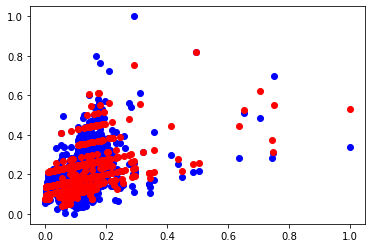

In [798]:
plt.scatter( X_train['LotArea'] , y_train , color = 'blue') # actual values
plt.scatter( X_train['LotArea'] , y_pred , color = 'red' ) # predicted values
plt.show()

#### Calculating the beta coefficient

In [799]:
print(lm.intercept_)
print(lm.coef_)

0.21071613273247164
[ 0.32159739  0.03786465  0.10375705 -0.04847479 -0.13764965 -0.11378974
 -0.0740666   0.1835122   0.24381109  0.10110412]


#### Anaylsing Error in the model.

In [800]:
rss = np.sum(np.square(y_train - y_pred))
print(rss)
mse = mean_squared_error(y_train, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

3.631027028778859
0.003609370803955128
0.060078039281880095


#### Residual analysis

In [801]:
y_res = y_train - y_pred

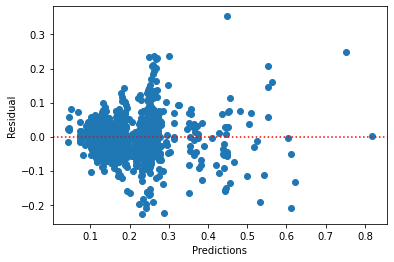

In [802]:
X_train_top10['res'] = y_res
plt.scatter( y_pred , X_train_top10['res'])
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

#### Analysing below distribution of errors

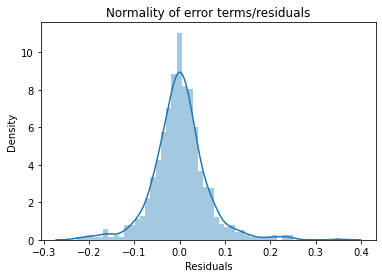

In [803]:
p = sns.distplot(y_res, kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

#### We can see the R-square on test data is also 0.69 and R-square on train data is 0.69 which is same. The model prediction on test set is similar to prediction on train test.
#### Error is normally distributed

## Ridge Regression

In [804]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_top10, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

#### Get the best hyperparameter alpha

In [805]:
print(model_cv.best_params_)

{'alpha': 0.0001}


#### Alpha of Ridge is 0.1

In [806]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_top10, y_train)
print(ridge.coef_)

[ 0.31693292  0.037849    0.10392531 -0.04841315 -0.13756326 -0.11381366
 -0.07410942  0.18304364  0.24157618  0.10162093  0.97319773]


In [807]:
X_train_top10.columns

Index(['LotArea', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'KitchenQual_Fa', 'OverallQual4', 'OverallQual5', 'OverallQual6',
       'OverallQual9', 'OverallQual10', 'FullBath3', 'res'],
      dtype='object')

## Lasso

In [808]:
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [809]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [811]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

#### Alpha of Lasso is 0.0001

In [812]:
lasso.coef_

array([ 7.33520746e-02,  4.57210504e-02,  1.17607513e-02,  3.60817530e-02,
       -2.59983524e-02,  1.23543726e-01,  0.00000000e+00,  2.75182575e-01,
        5.41461464e-03,  4.30584799e-02,  1.72416042e-02,  5.33338935e-03,
        1.61621178e-02,  1.24471412e-02,  0.00000000e+00,  7.41939130e-03,
       -0.00000000e+00,  3.25272882e-03,  6.90257247e-03, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -1.40323421e-02,  2.95630615e-03,
       -0.00000000e+00,  1.20509170e-02, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.45870709e-03, -3.50100481e-03,  0.00000000e+00,
        0.00000000e+00,  1.44199587e-02,  0.00000000e+00, -8.45341984e-04,
        3.95412030e-02, -7.81974801e-03,  0.00000000e+00, -0.00000000e+00,
       -6.04870652e-03, -4.33843977e-03, -3.26008596e-03,  0.00000000e+00,
       -5.92890608e-03,  3.53274509e-02,  2.40385969e-02, -1.47347642e-03,
        0.00000000e+00, -1.03649468e-04,  5.64039688e-04,  4.77347675e-03,
        2.80748433e-02, -

In [813]:
X_train.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallQual2,OverallQual3,OverallQual4,OverallQual5,OverallQual6,OverallQual7,OverallQual8,OverallQual9,OverallQual10,OverallCond2,OverallCond3,OverallCond4,OverallCond5,OverallCond6,OverallCond7,OverallCond8,OverallCond9,FullBath1,FullBath2,FullBath3,HalfBath1,HalfBath2,BedroomAbvGr1,BedroomAbvGr2,BedroomAbvGr3,BedroomAbvGr4,BedroomAbvGr5,BedroomAbvGr6,BedroomAbvGr8,MoSold2,MoSold3,MoSold4,M

In [814]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9397988922672411
-5.553498731160129
0.718262776806688
16134870607127.777
0.0007139789033863698
37349237516.49948


#### The equation of best fitted line is
##### SalePrice=0.31693292*'LotArea' + 0.037849*'Neighborhood_Crawfor' + 0.10392531*'Neighborhood_NoRidge' - 0.04841315*'KitchenQual_Fa' - 0.13756326*'OverallQual4' - 0.11381366*'OverallQual5' - 0.07410942*'OverallQual6' + 0.18304364*'OverallQual9' + 0.24157618*'OverallQual10' + 0.10162093*'FullBath3'

### Inferances:
#### 1) As the Lot Area, Increase, SalePrice increases and vice versa.
#### 2) Sale Price increase if house have following categorical parameter i.e Neighborhood as Crawfor and NoRidge, the overall material and finish of the house are Very Excellent, Excellent,Very Good.
#### 4) Sale Price decreases if house have following categorical parameter i.e Adjacent to postive off-site feature, the general condition of the KitchenQual_Fa, OverallQual4, OverallQual5, OverallQual6 the overall material and finish of the house is Fair and Below average,average,Above Average. 

#### 5) The R-Squared value on test data is 0.69 and R-square on train data is 0.69
#### 6) The equation is SalePrice=0.31693292*'LotArea' + 0.037849*'Neighborhood_Crawfor' + 0.10392531*'Neighborhood_NoRidge' - 0.04841315*'KitchenQual_Fa' - 0.13756326*'OverallQual4' - 0.11381366*'OverallQual5' - 0.07410942*'OverallQual6' + 0.18304364*'OverallQual9' + 0.24157618*'OverallQual10' + 0.10162093*'FullBath3'	
#### 7) The optimal value of lambda for ridge and for lasso regression is 0.0001.

## Problem Statement - Part II
#### Question 1, analyzing changes in the model by double the value of alpha for both ridge and lasso.
#### Double value of ridge and lasso alpha= .0002

In [815]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.0002
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_top10, y_train)
print(ridge.coef_)

[ 0.32158791  0.03786463  0.1037574  -0.04847467 -0.13764948 -0.11378979
 -0.07406668  0.18351126  0.24380658  0.10110518  0.99994492]


#### After doubling the alpha for ridge, there is slight increase in the coeffiecent value of some variable while coeffiecent if some variable decreases. The most important variable is the overall material and finish of the house is Very Excellent

In [816]:
alpha = 0.0002
lasso = Lasso(alpha=alpha)      
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [817]:
lasso.coef_

array([ 5.86604710e-02,  3.62005925e-02,  1.46442543e-02,  2.82148270e-02,
       -1.56205740e-02,  1.19466406e-01,  0.00000000e+00,  2.62422247e-01,
        3.63640681e-03,  4.36417244e-02,  1.47023081e-02,  1.07995357e-03,
        1.09701414e-02,  6.92686399e-03,  0.00000000e+00,  5.40674090e-03,
       -1.54868783e-03,  0.00000000e+00,  7.54622882e-03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -5.05094156e-03,  2.99323366e-03,
       -0.00000000e+00,  1.13514918e-02, -0.00000000e+00, -0.00000000e+00,
       -5.40493650e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.23943459e-02,  0.00000000e+00, -0.00000000e+00,
        3.78695977e-02, -5.71875462e-03,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -7.26896535e-04,  3.16491432e-02,  2.31300994e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  4.94602947e-03,
        2.22542151e-02, -